***Importing the dependencies***

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

***Data Collection and Preparation***

---

In [2]:
df=pd.read_csv("Mall_Customers.csv")      # read the CSV file into a DataFrame
df                                        # display the DataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()   # display the first few rows of the DataFrame (by default first 5 rows will print)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()   # display the last few rows of the DataFrame (by default last 5 rows will print)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()    # provides a concise summary of a DataFrame, it includes details such as the number of non-null entries,
             # the data type of each column, and the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()  # provides summary statistics for numerical columns

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull()  # returns a DataFrame with True/False values indicating missing values (False (0) - no NULL value & True (1) - NULL value)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
df.isnull().sum()  # returns the number of missing values in each column

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We can see that there are no values to clean by calling describe. Age appears to be rather regularly distributed, and there aren't any extremely high or low outliers in annual income in the thousands. In actuality, the spending score ranges from 1 to 100. Everything appears to be in order.

***Data Visualization***

---

In [9]:
df.Gender.value_counts()  # returns the count of unique values in the "Gender" column

Gender
Female    112
Male       88
Name: count, dtype: int64

<ipython-input-10-6d7bccea48ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Gender', data = df, palette = ["blue", "pink"])  # counts the unique values in the "Gender" column and plots them as a bar chart


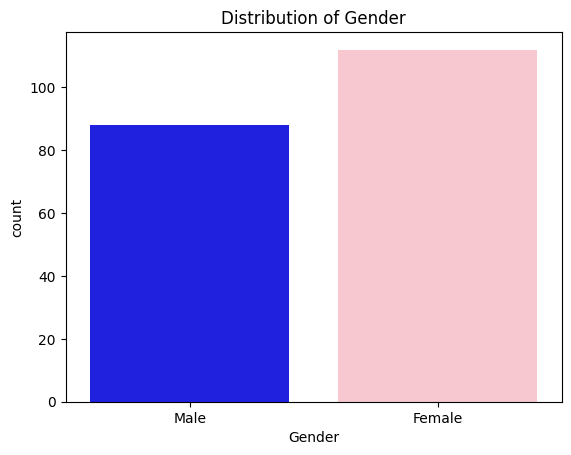

In [10]:
# distribution of gender to recognize different distributions

sns.countplot(x= 'Gender', data = df, palette = ["blue", "pink"])  # counts the unique values in the "Gender" column and plots them as a bar chart
plt.title('Distribution of Gender')                                # sets the title of the plot
plt.show()                                                         # displays the plot

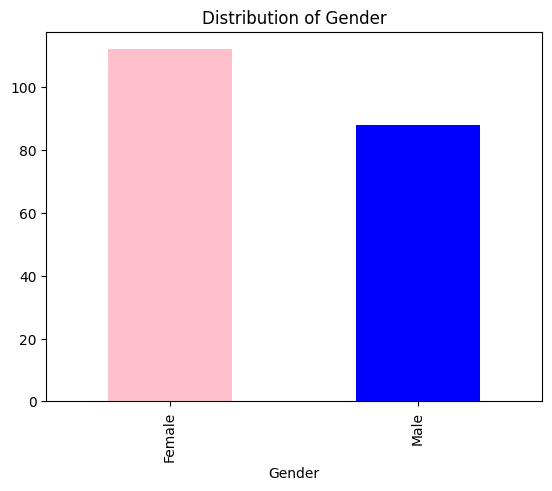

In [11]:
# we  can also make the above bar chart using 'plot' also

df.Gender.value_counts().plot(kind = 'bar', color = ["pink", "blue"])  # counts the unique values in the "Gender" column and plots them as a bar chart
plt.title('Distribution of Gender')                                    # sets the title of the plot
plt.show()                                                             # displays the plot

There are more women than men in this dataset.

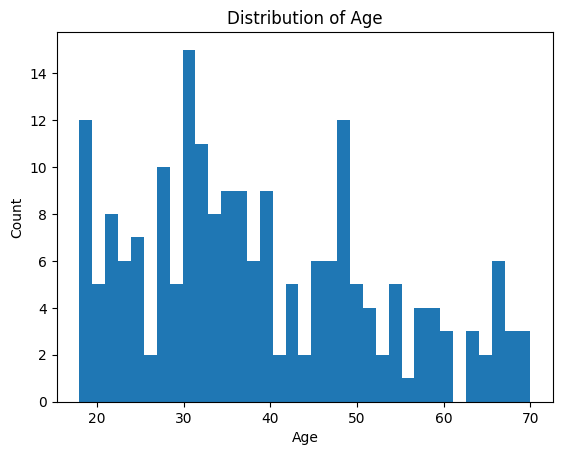

In [12]:
# histogram of ages

df.hist('Age', bins=35)           # creates a histogram of the "Age" column with 35 bins
plt.title('Distribution of Age')  # sets the title of the plot
plt.xlabel('Age')                 # sets the label for the x-axis
plt.ylabel('Count')               # sets the label for the y-axis
plt.grid(False)                   # hides the grid lines
plt.show()                        # displays the plot

In [13]:
df['Age'].mean()  # calculate the average (mean) of the 'Age' column

38.85

Two items are visible here, one of which was already mentioned in the describe call:
1. The data collection has more women than men.
2. A large number of middle-aged and younger women are present.

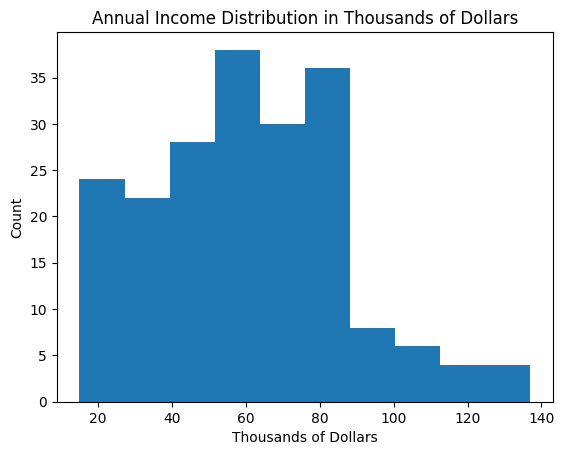

In [14]:
# histogram of income

df.hist('Annual Income (k$)')  # creates a histogram of the "Annual Income (k$)" column
plt.title('Annual Income Distribution in Thousands of Dollars')  # sets the title of the plot
plt.xlabel('Thousands of Dollars')  # sets the label for the x-axis
plt.ylabel('Count')                 # sets the label for the y-axis
plt.grid(False)                     # hides the grid lines
plt.show()                          # displays the plot

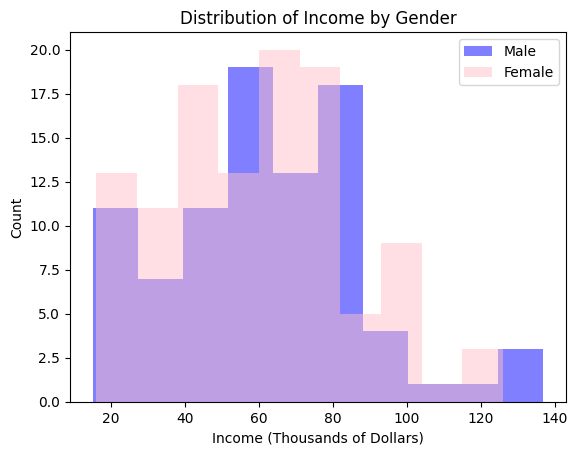

In [15]:
# histogram of income by gender

plt.hist('Annual Income (k$)', data = df[df['Gender'] == 'Male'], alpha=0.5, color = 'blue', label='Male')  # creates a histogram of the "Annual Income (k$)" column for male customers
plt.hist('Annual Income (k$)', data = df[df['Gender'] == 'Female'], alpha=0.5, color = 'pink', label='Female')  # creates a histogram of the "Annual Income (k$)" column for female customers
plt.title('Distribution of Income by Gender')  # sets the title of the plot
plt.xlabel('Income (Thousands of Dollars)')    # sets the label for the x-axis
plt.ylabel('Count')                            # sets the label for the y-axis
plt.legend()                                   # adds a legend to the plot
plt.show()                                     # displays the plot

The majority of women's incomes fell between 45 and 80,000, making them generally less than men's.

In [16]:
# create data sets by gender

# filter the DataFrame 'df' based on the 'Gender' column, creating two separate DataFrames : one for male customers and one for female customers
# df : original DataFrame that contains all customer data
# df['Gender'] == 'Male' : a boolean series (a series of True/False values) where each value indicates whether the corresponding row in the 'Gender' column is 'Male'
# df[df['Gender'] == 'Male'] : this applies the boolean series to the DataFrame, filtering it to include only the rows where the 'Gender' column is 'Male'
# male_customers : this is a new DataFrame containing only the rows from df where the 'Gender' column is 'Male'

male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

In [17]:
male_customers.head()  # display the first few rows of the male_customers DataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


In [18]:
female_customers.head()  # display the first few rows of the female_customers DataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [19]:
# print the average spending score for men and women

print("Average Spending Score of Men:", male_customers['Spending Score (1-100)'].mean())
print("Average Spending Score of Female:", female_customers['Spending Score (1-100)'].mean())

Average Spending Score of Men: 48.51136363636363
Average Spending Score of Female: 51.526785714285715


Women on average had a higher spending score by about 3 points.

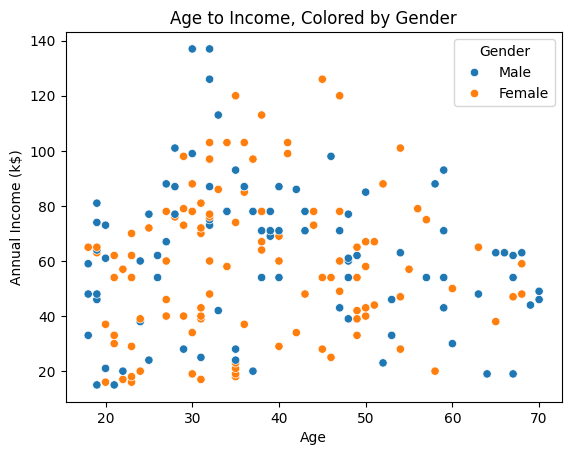

In [20]:
# creates a scatter plot to visualize the relationship between 'Age' and 'Annual Income (k$)' in the DataFrame df, with points colored by 'Gender'

# sns.scatterplot : function from Seaborn creates a scatter plot
# x = 'Age' : specifies the column 'Age' from the DataFrame df for the x-axis
# y = 'Annual Income (k$)' : specifies the column 'Annual Income (k$)' from the DataFrame df for the y-axis
# hue = 'Gender' : colors the points in the scatter plot based on the 'Gender' column. Different genders will have different colors, making it easier to distinguish them in the plot
# data = df : specifies the DataFrame df as the source of the data

sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', hue = 'Gender', data = df)
plt.title('Age to Income, Colored by Gender')
plt.show()

To determine the relationship between age and annual income by looking at a scatter plot, you should consider the following aspects:

***Visual Indicators of Relationship:***

> 1. *Trend Line:*
* Adding a trend line (e.g., using regression) can help visualize the overall trend.
* If the points trend upward from left to right, it suggests a positive correlation. If they trend downward, it suggests a negative correlation.
2. *Point Distribution:*
* Look at the spread and direction of the points.
* If higher ages (towards the right side of the plot) correspond to higher incomes (higher on the y-axis), it suggests a positive correlation.

> ***Steps to Analyze the Scatter Plot:***
1. *Create the Scatter Plot:*
* Plot age on the x-axis and annual income on the y-axis.
2. *Examine the Distribution:*
* Look for any obvious patterns or trends in the data points.
* Observe whether the points show an upward or downward slope as age increases.
3. *Add a Trend Line:*
* Adding a line of best fit (regression line) can help highlight the trend.

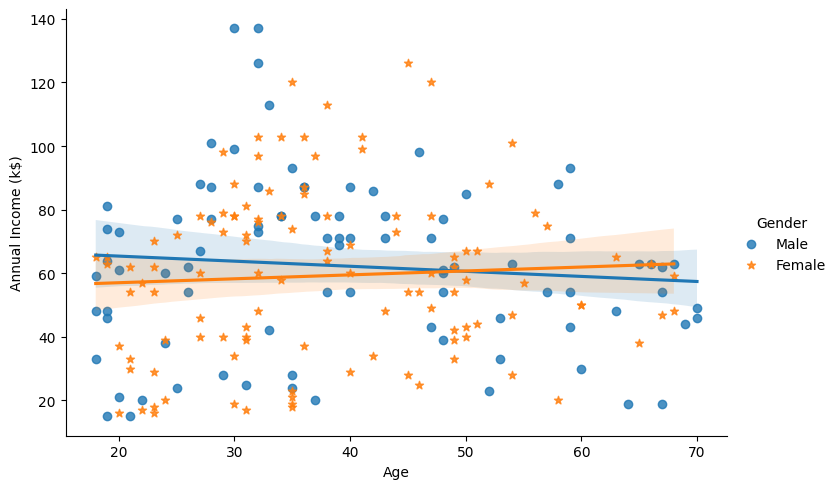

In [21]:
# create a scatter plot with a regression line for each gender, allowing you to compare the relationship between 'Age' and 'Annual Income (k$)' for males and females

# sns.lmplot : function from Seaborn creates a scatter plot with a regression line
# x = 'Age' : specifies the column 'Age' from the DataFrame df for the x-axis
# y = 'Annual Income (k$)' : specifies the column 'Annual Income (k$)' from the DataFrame df for the y-axis
# hue = 'Gender' : colors the points in the scatter plot based on the 'Gender' column. Different genders will have different colors, making it easier to distinguish them in the plot
# data = df : specifies the DataFrame df as the source of the data
# aspect = 1.5 : aspect ratio of the plot (aspect ratio is defined as the ratio of the width of the plot to its height)
# markers = ['o', '*'] : different markers for males and female

sns.lmplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, aspect=1.5, markers=['o', '*'])

> ***Visual Interpretation***
1. *Trend Line Slope:*
* The slope of the regression line indicates the direction of the relationship. An upward slope (line going upwards from left to right) indicates a positive correlation. A downward slope indicates a negative correlation.
2. *Point Clustering:*
* If points are clustered around the regression line and show a general upward or downward trend, this indicates the direction and strength of the correlation.

> ***Reasoning***
1. *Positive Correlation:*
* If the regression line slopes upward and higher ages generally correspond to higher incomes, it indicates a positive correlation: as age increases, annual income tends to increase.
2. *Negative Correlation:*
* If the regression line slopes downward and higher ages correspond to lower incomes, it indicates a negative correlation: as age increases, annual income tends to decrease.
3. *No Correlation:*
* If the points are widely scattered with no clear trend line, it indicates there is little to no correlation between age and annual income.

---

This visualization helps to identify any patterns or trends in the relationship between age and annual income, and how these patterns differ between genders.

---
There is pretty much no correlation between age and income for either men or women in this data. The correlation matrix below confirms this.

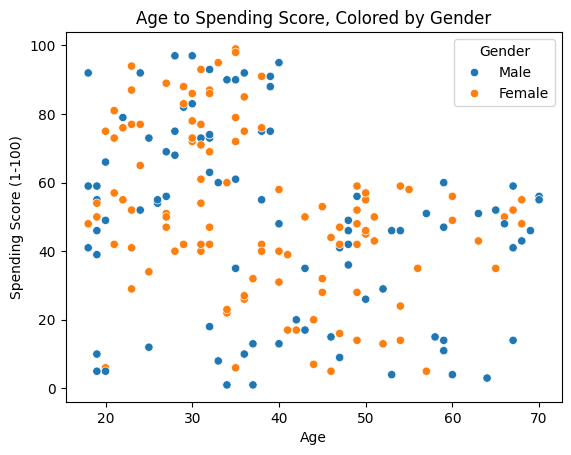

In [22]:
# creates a scatter plot to visualize the relationship between 'Age' and 'Spending Score (1-100)' in the dataframe df, with points colored by 'Gender'

# sns.scatterplot : function from Seaborn creates a scatter plot
# x = 'Age' : specifies the column 'Age' from the dataframe df for the x-axis
# y = 'Spending Score (1-100)' : specifies the column 'Spending Score (1-100)' from the dataframe df for the y-axis
# hue = 'Gender' : colors the points in the scatter plot based on the 'Gender' column. Different genders will have different colors, making it easier to distinguish them in the plot
# data = df : specifies the DataFrame df as the source of the data

sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', hue = 'Gender', data = df);
plt.title('Age to Spending Score, Colored by Gender');

To determine the relationship between age and spending score by looking at a scatter plot, you should consider the following aspects:

> ***Visual Indicators of Correlation in a Scatter Plot:***
1. *Trend Line:*
* Adding a trend line (e.g., using regression) can help visualize the overall trend.
* If the points trend downward from left to right, it suggests a negative correlation.
2. *Point Distribution:*
* Look at the spread and direction of the points.
* If older individuals (points towards the right side of the plot) have generally lower spending scores (lower on the y-axis), it suggests a negative correlation.

> ***Scatter Plot Analysis Steps:***
1. *Create the Scatter Plot:*
* Plot age on the x-axis and spending score on the y-axis.
* Use a distinct color to differentiate genders (if relevant).
2. *Examine the Distribution:*
* Look for any obvious patterns or trends in the data points.
* Observe whether the points show a downward slope as age increases.
3. *Add a Trend Line:*
* Adding a line of best fit (regression line) can help highlight the trend.

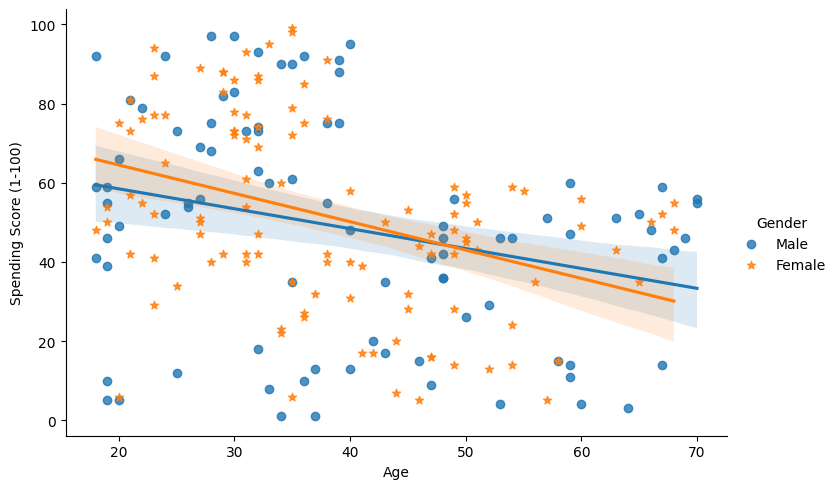

In [23]:
# create a scatter plot with a regression line for each gender, allowing you to compare the relationship between 'Age' and 'Spending Score (1-100)' for males and females

# sns.lmplot : function from Seaborn creates a scatter plot with a regression line
# x = 'Age' : specifies the column 'Age' from the DataFrame df for the x-axis
# y = 'Spending Score (1-100)' : specifies the column 'Spending Score (1-100)' from the DataFrame df for the y-axis
# hue = 'Gender' : colors the points in the scatter plot based on the 'Gender' column. Different genders will have different colors, making it easier to distinguish them in the plot
# data = df : specifies the DataFrame df as the source of the data
# aspect = 1.5 : aspect ratio of the plot (aspect ratio is defined as the ratio of the width of the plot to its height)
# markers = ['o', '*'] : different markers for males and female

sns.lmplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, aspect=1.5, markers=['o', '*'])

> ***Visual Interpretation***
1. *Trend Line Slope:*
* The slope of the regression line indicates the direction of the relationship. A negative slope (line going downwards from left to right) indicates a negative correlation.
2. *Point Clustering:*
* If points are clustered around the regression line and show a general downward trend, this further indicates a negative correlation.

> ***Reasoning***
1. *Negative Correlation:*
* As age increases, the spending score decreases, indicated by the downward trend of the points and the negative slope of the regression line.
* This means that older individuals tend to have lower spending scores compared to younger individuals.
2. *Strength of Correlation:*
* The scatter plot can also show how strong or weak the correlation is by how closely the points cluster around the trend line. If the points are widely scattered, it indicates a weaker correlation.

---

The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.

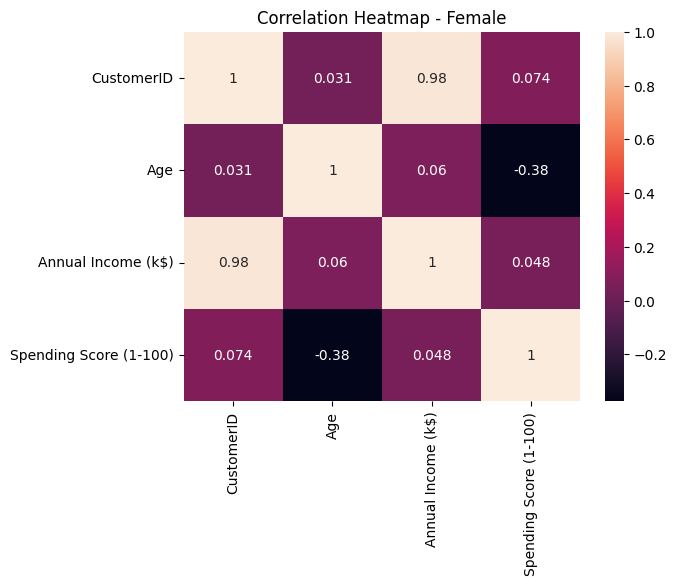

In [24]:
# create a correlation heatmap for the female customers in the dataframe df, excluding the 'Gender' column

# sns.heatmap : function from Seaborn creates a heatmap

# female_customers : this dataframe contains only the rows where the 'Gender' column is 'Female'
# .drop('Gender', axis=1) : removes the 'Gender' column from the dataframe,' axis = 1' specifies that we're dropping a column (not a row)
# female_customers.drop('Gender', axis=1).corr() : the correlation matrix of the DataFrame without the 'Gender' column

# .corr() : calculates the correlation matrix for the dataframe, the correlation matrix shows the pairwise correlation coefficients between the columns
# annot = True : shows the correlation coefficients as annotations on the heatmap

sns.heatmap(female_customers.drop('Gender', axis = 1).corr(), annot = True);
plt.title('Correlation Heatmap - Female');

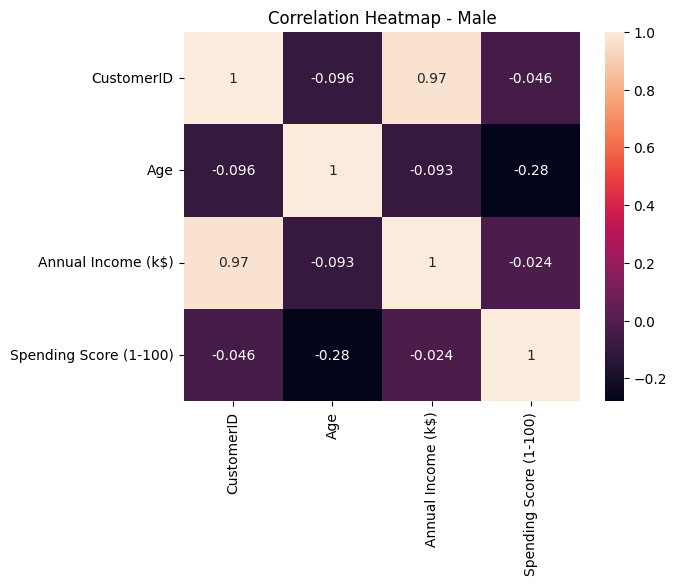

In [25]:
# create a correlation heatmap for the male customers in the dataframe df, excluding the 'Gender' column

# sns.heatmap : function from Seaborn creates a heatmap

# male_customers : this dataframe contains only the rows where the 'Gender' column is 'Male'
# .drop('Gender', axis=1) : removes the 'Gender' column from the dataframe,' axis = 1' specifies that we're dropping a column (not a row)
# male_customers.drop('Gender', axis=1).corr() : the correlation matrix of the DataFrame without the 'Gender' column

# .corr() : calculates the correlation matrix for the dataframe, the correlation matrix shows the pairwise correlation coefficients between the columns
# annot = True : shows the correlation coefficients as annotations on the heatmap

sns.heatmap(male_customers.drop('Gender', axis = 1).corr(), annot = True);
plt.title('Correlation Heatmap - Male');

Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women.

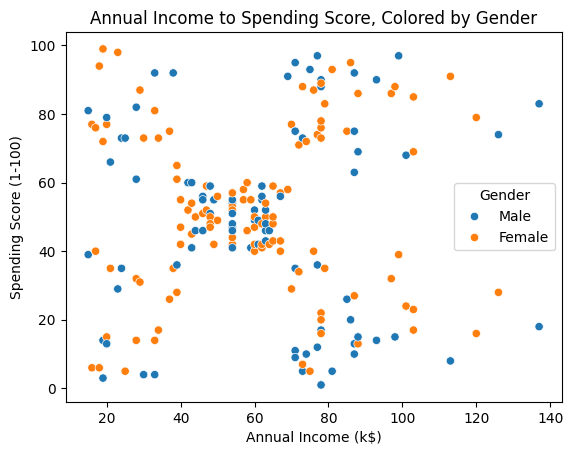

In [26]:
# visualizes the relationship between Annual Income ($k) and Spending Score (1-100), with different colors representing genders

# x : represents the Annual Income (k$)
# y : represents the Spending Score (1-100)
# hue : colors the points based on the 'Gender' column
# data : specifies the DataFrame df as the source of the data

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Gender', data = df);
plt.title('Annual Income to Spending Score, Colored by Gender');

***Interpretation of the above scatter plot***
1. *Relationship Between Variables:*
* *Income and Spending Score -->* You can look for any visible patterns or trends between income and spending score.
* *Gender Differences -->* By using color, you can compare the spending behavior of different genders.
2. *Patterns:*
* *Cluster Identification -->* Look for clusters of points that might indicate groups with similar spending behavior.
* *Correlation -->* Observe if there is any apparent correlation (positive, negative, or none) between annual income and spending score.
3. *Outliers:*
* *Extreme Values -->* Identify any outliers, such as individuals with exceptionally high or low spending scores compared to their income level.

---

Annual Income and Spending Score have somewhat related means and standard deviations, which is why we see this strange shape. But there is very low if no correlation here.

In [27]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

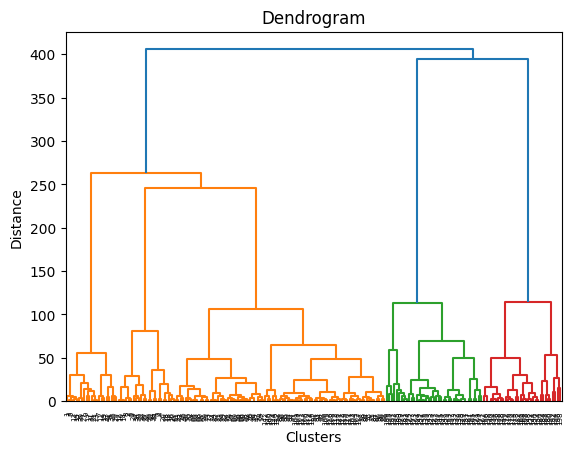

In [28]:
# "linkage" --> functionality of it is to create a link between the nearest clusters means merge two clusters
# "ward" --> it is a built-in function used for merging the two clusters

d = sch.dendrogram(sch.linkage(x, method='ward'))
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

***Data Modeling***

---

K-Mean Clustering

In [29]:
model1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)  # create a KMeans clustering model with 5 clusters

In [30]:
y_pred = model1.fit_predict(x)  # fit the model to the data and predict the cluster labels
y_pred                          # display the predicted cluster labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [31]:
model1.cluster_centers_     # display the coordinates of the cluster centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

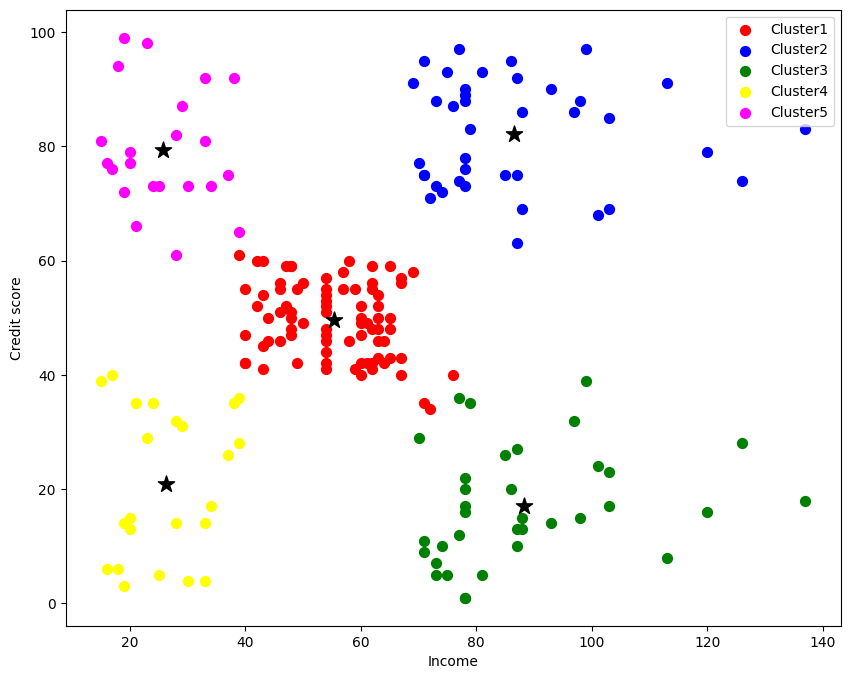

In [32]:
plt.figure(figsize=(10,8))    # create a figure with a specified size

# plotting all the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'red', s=50, label = 'Cluster1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'blue', s=50, label = 'Cluster2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'green', s=50, label = 'Cluster3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], c = 'yellow', s=50, label = 'Cluster4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], c = 'magenta', s=50, label = 'Cluster5')

# plot the centroids
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], s=150, c='black', marker='*')
plt.xlabel("Income")
plt.ylabel("Credit score")
plt.legend()
plt.show()

Agglomerative Clustering

In [33]:
model2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  # create an Agglomerative Clustering model with 5 clusters

In [34]:
y_pred = model2.fit_predict(x)  # fit the model to the data and predict the cluster labels
y_pred                          # display the predicted cluster labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

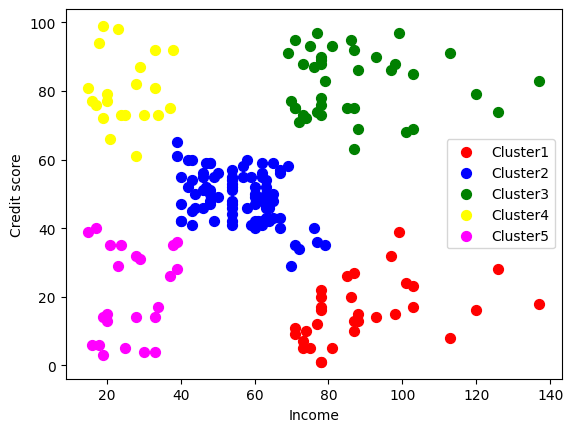

In [35]:
# plotting all the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred ==0,1], c ='red', s = 50, label = 'Cluster1')
plt.scatter(x[y_pred == 1, 0], x[y_pred ==1,1], c ='blue', s = 50, label = 'Cluster2')
plt.scatter(x[y_pred == 2, 0], x[y_pred ==2,1], c = 'green', s = 50, label = 'Cluster3')
plt.scatter(x[y_pred == 3, 0], x[y_pred ==3,1], c = 'yellow', s = 50, label = 'Cluster4')
plt.scatter(x[y_pred == 4, 0], x[y_pred ==4,1], c = 'magenta', s = 50, label = 'Cluster5')
plt.xlabel("Income")
plt.ylabel("Credit score")
plt.legend()
plt.show()

There are 5 rough clusters here:


1.   Low income, low spending score

2.   Low income, high spending score

3.   Mid income, medium spending score

4.   High income, low spending score

5.   High income, high spending score

Interestingly, there are no high income, medium spending score points